In [23]:
from collections import defaultdict, Counter, namedtuple
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations, product
import scipy.stats as stats
from os import listdir
import json

In [24]:
data_dir = '../../DATA/ssc.hg38'

In [25]:
with open('%s/phase/sibpairs.json' % data_dir, 'r') as f:
    sibpairs = json.load(f)
print('sibpairs', len(sibpairs))

sibpairs 1934


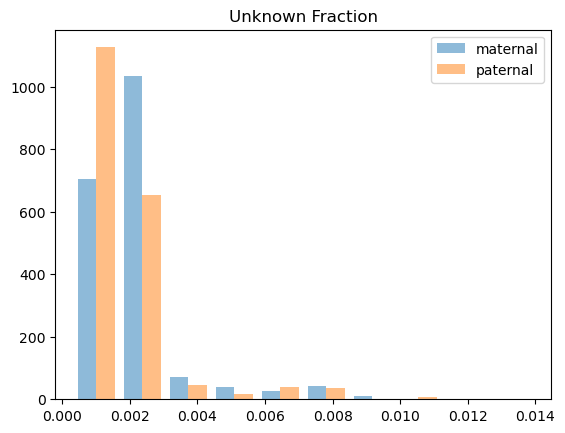

In [26]:
plt.hist([[x['maternal_unknown_fraction'] for x in sibpairs if 'maternal_unknown_fraction' in x], 
          [x['paternal_unknown_fraction'] for x in sibpairs if 'paternal_unknown_fraction' in x]], 
         alpha=0.5, label=['maternal', 'paternal'])
plt.title('Unknown Fraction')
plt.legend()
plt.show()

In [27]:
print('identicals', len([(x['family'], x['sibling1'], x['sibling2']) for x in sibpairs if x['is_identical']]))
print('unrelated', len([(x['family'], x['sibling1'], x['sibling2']) for x in sibpairs if not x['is_full_sibling']]),
     [(x['family'], x['sibling1'], x['sibling2']) for x in sibpairs if not x['is_full_sibling']])

identicals 1
unrelated 3 [('11289', 'SSC02095', 'SSC02111'), ('13879', 'SSC08783', 'SSC08794'), ('13892', 'SSC09326', 'SSC09339')]


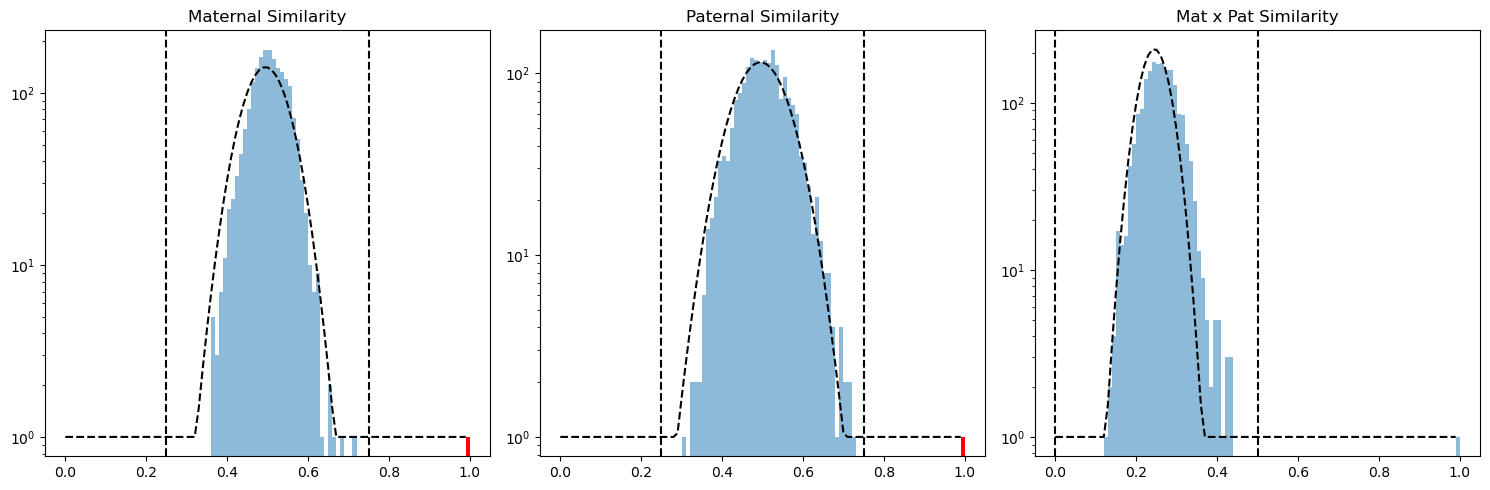

In [28]:
mat_scores = np.array([x['maternal_ibd'] for x in sibpairs if 'maternal_ibd' in x])
pat_scores = np.array([x['paternal_ibd'] for x in sibpairs if 'paternal_ibd' in x])
both_scores = np.array([x['matxpat_ibd'] for x in sibpairs if 'matxpat_ibd' in x])

bins = np.arange(0, 1.01, 0.01)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Maternal Similarity')
plt.hist(mat_scores, alpha=0.5, bins=bins, log=True)
plt.hist(mat_scores[mat_scores<0.25], color='red', bins=bins, log=True)
plt.hist(mat_scores[mat_scores>0.75], color='red', bins=bins, log=True)

p = 0.5
n = 2*42
model = stats.norm.cdf(bins[1:]*n, n*p, np.sqrt(n*p*(1-p)))-stats.norm.cdf(bins[:-1]*n, n*p, np.sqrt(n*p*(1-p)))
model = model/np.sum(model)
plt.plot(bins[:-1], np.clip(len(mat_scores)*model, 1, None), color='black', linestyle='--')

plt.axvline(0.25, color='black', linestyle='--')
plt.axvline(0.75, color='black', linestyle='--')

plt.subplot(1, 3, 2)
plt.title('Paternal Similarity')
plt.hist(pat_scores, alpha=0.5, bins=bins, log=True)
plt.hist(pat_scores[pat_scores<0.25], color='red', bins=bins, log=True)
plt.hist(pat_scores[pat_scores>0.75], color='red', bins=bins, log=True)

n = 2*28
model = stats.norm.cdf(bins[1:]*n, n*p, np.sqrt(n*p*(1-p)))-stats.norm.cdf(bins[:-1]*n, n*p, np.sqrt(n*p*(1-p)))
model = model/np.sum(model)
plt.plot(bins[:-1], np.clip(len(pat_scores)*model, 1, None), color='black', linestyle='--')

plt.axvline(0.25, color='black', linestyle='--')
plt.axvline(0.75, color='black', linestyle='--')

plt.subplot(1, 3, 3)
plt.title('Mat x Pat Similarity')
plt.hist(both_scores, alpha=0.5, bins=bins, log=True)

n = 2*28 + 2*42
p = 0.25
model = stats.norm.cdf(bins[1:]*n, n*p, np.sqrt(n*p*(1-p)))-stats.norm.cdf(bins[:-1]*n, n*p, np.sqrt(n*p*(1-p)))
model = model/np.sum(model)
plt.plot(bins[:-1], np.clip(len(both_scores)*model, 1, None), color='black', linestyle='--')

plt.axvline(0.0, color='black', linestyle='--')
plt.axvline(0.5, color='black', linestyle='--')

plt.tight_layout()
plt.show()

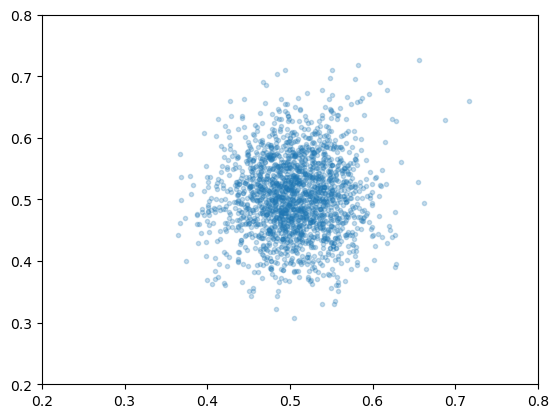

In [31]:
plt.scatter(mat_scores, pat_scores, alpha=0.25, marker='.')
plt.xlim([0.2, 0.8])
plt.ylim([0.2, 0.8])

plt.show()

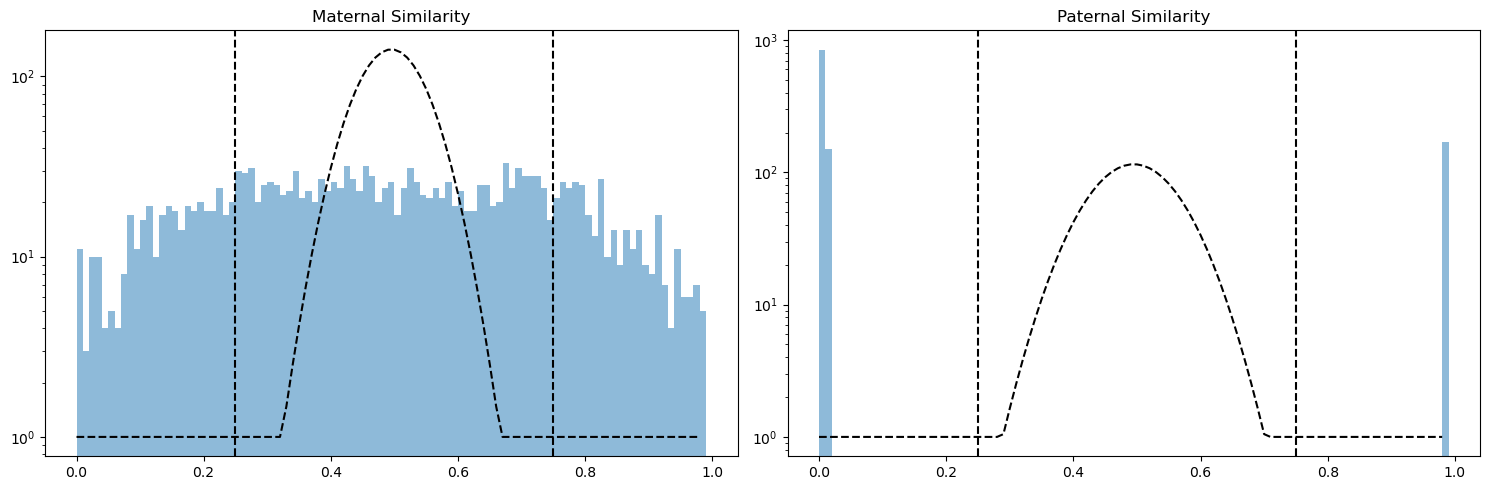

In [32]:
mat_scores_X = np.array([x['maternal_ibd_chroms'][-1] for x in sibpairs if x['maternal_ibd_chroms'][-1] is not None])
pat_scores_X = np.array([x['paternal_ibd_chroms'][-1] for x in sibpairs if x['paternal_ibd_chroms'][-1] is not None])

bins = np.arange(0, 1, 0.01)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Maternal Similarity')
plt.hist(mat_scores_X, alpha=0.5, bins=bins, log=True)

p = 0.5
n = 2*42
model = stats.norm.cdf(bins[1:]*n, n*p, np.sqrt(n*p*(1-p)))-stats.norm.cdf(bins[:-1]*n, n*p, np.sqrt(n*p*(1-p)))
model = model/np.sum(model)
plt.plot(bins[:-1], np.clip(len(mat_scores_X)*model, 1, None), color='black', linestyle='--')

plt.axvline(0.25, color='black', linestyle='--')
plt.axvline(0.75, color='black', linestyle='--')

plt.subplot(1, 2, 2)
plt.title('Paternal Similarity')
plt.hist(pat_scores_X, alpha=0.5, bins=bins, log=True)

n = 2*28
model = stats.norm.cdf(bins[1:]*n, n*p, np.sqrt(n*p*(1-p)))-stats.norm.cdf(bins[:-1]*n, n*p, np.sqrt(n*p*(1-p)))
model = model/np.sum(model)
plt.plot(bins[:-1], np.clip(len(pat_scores_X)*model, 1, None), color='black', linestyle='--')

plt.axvline(0.25, color='black', linestyle='--')
plt.axvline(0.75, color='black', linestyle='--')

plt.tight_layout()
plt.show()